In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\clustering':
  os.chdir(r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\clustering')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\k\AppData\Local\Temp\ipykernel_35892\325524663.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap_external.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\codecs.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\aliases.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\__init__.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\utf_8.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\io.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\stat.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\_collections_abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\genericpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\ntpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\os.py": 1686090633.0, "C:\\Users\\k

In [2]:
import numpy as np
import pandas as pd
dat = pd.read_csv("playDatSteelCity23.csv")
dat = dat.drop(['Unnamed: 0'], axis=1)
dat.head()

,Player,ActivePoss,ActivePossScored,ScorePerc,Touches,PickUp,CenterThrow,DumpThrow,SwingThrow,UpLineThrow,...,RecEPA,HanEPARes,HanEPA2,HanEPATurn,RecEPATurn,EPA,TourneyScore,TourneyGrade,EPAPerPoss,EPAPerTouch
0,AR,20,7,35.0,54,6,0,0,9,2,...,0.398,0.718,1.108,-0.420,0.000,1.248,1.00,A,0.062377,0.023103
1,AK,10,5,50.0,25,0,0,0,2,0,...,0.200,0.300,0.307,0.000,0.000,0.248,0.33,B,0.024833,0.009933
2,JL,41,15,36.6,115,2,0,3,21,6,...,1.843,0.956,-0.073,-2.074,-0.416,1.512,0.95,B,0.036869,0.013145
3,ZA,16,7,43.8,40,4,1,1,5,3,...,-0.101,0.415,0.589,-0.829,-0.209,0.230,0.59,B,0.014361,0.005744
4,CM,29,10,34.5,119,19,2,5,12,5,...,0.229,0.637,0.612,-1.915,0.000,0.583,0.16,C,0.020089,0.004896


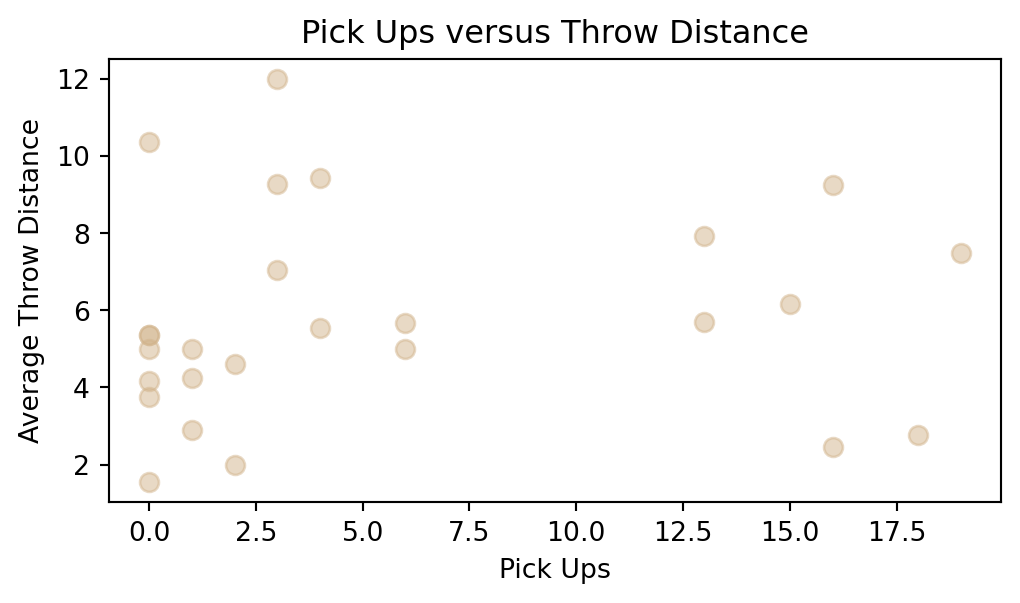

In [3]:
import matplotlib.pyplot as plt
x1 = dat['PickUp']
x2 = dat['AvgThrow']

fig = plt.figure(figsize = (6, 3))
ax = fig.add_subplot(111)
plt.scatter(x1, x2, color = 'tan', s = 50, alpha = 0.5)
plt.xlabel("Pick Ups")
plt.ylabel("Average Throw Distance")
plt.title("Pick Ups versus Throw Distance")
plt.show()

C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


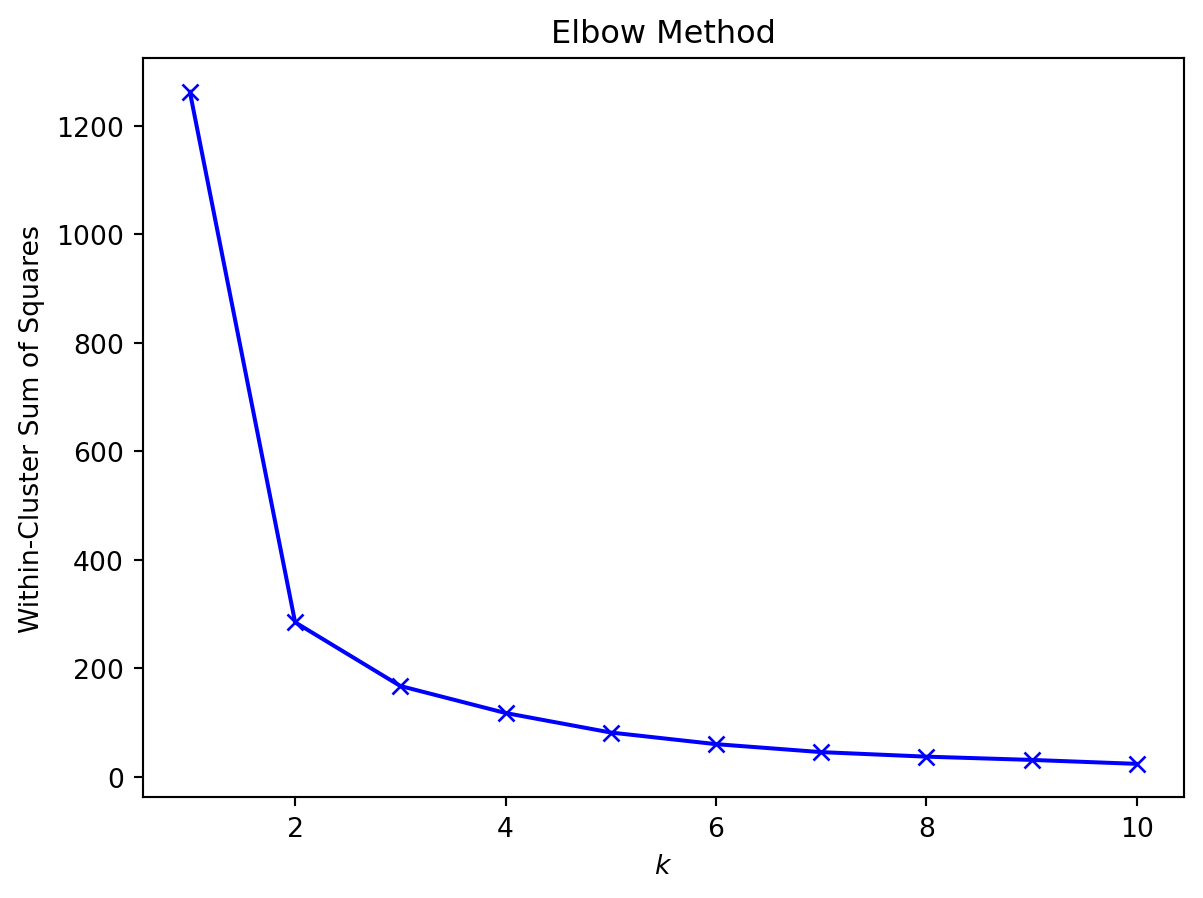

In [4]:
from sklearn.cluster import KMeans
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
K = range(1, 11)
wcss = []

for k in K: 
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
  
plt.plot(K, wcss, 'bx-')
plt.xlabel('$k$')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


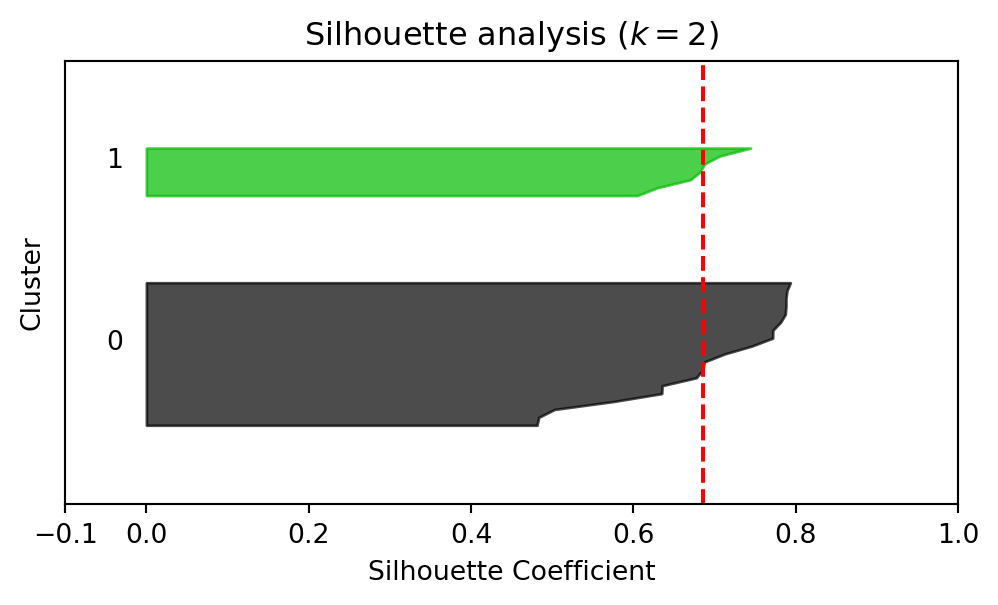

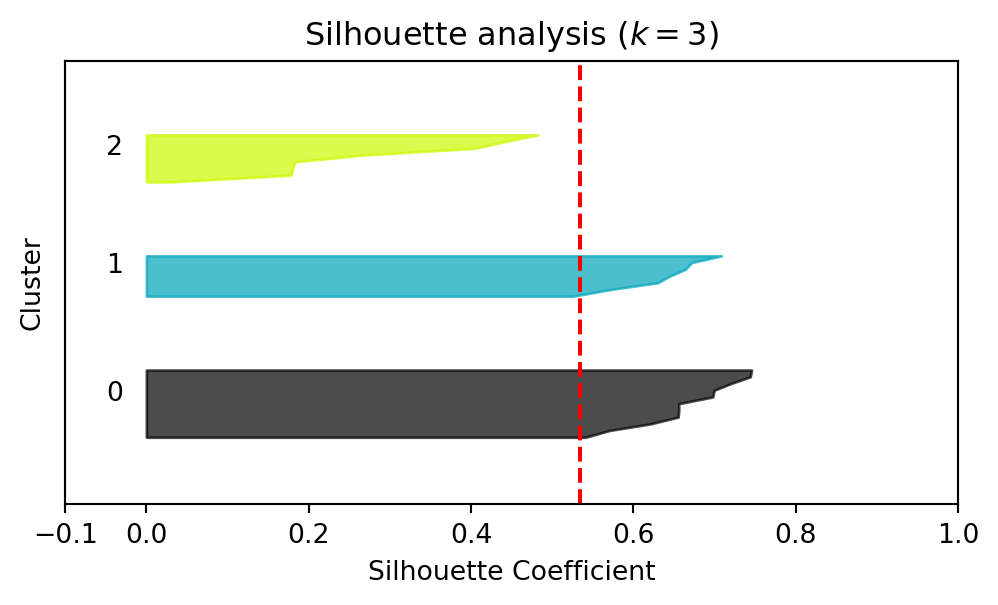

In [5]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

K = range(2, 4)

for k in K:
    fig = plt.figure(figsize = (6, 3))
    ax = fig.add_subplot(111)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    sample = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(k):
        cluster_values = sample[labels == i]
        cluster_values.sort()
        size = cluster_values.shape[0]
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size, str(i))
        y_lower = y_upper + 10

    ax.set_title("Silhouette analysis ($k = %d$)" % k)
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\k\anaconda3\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


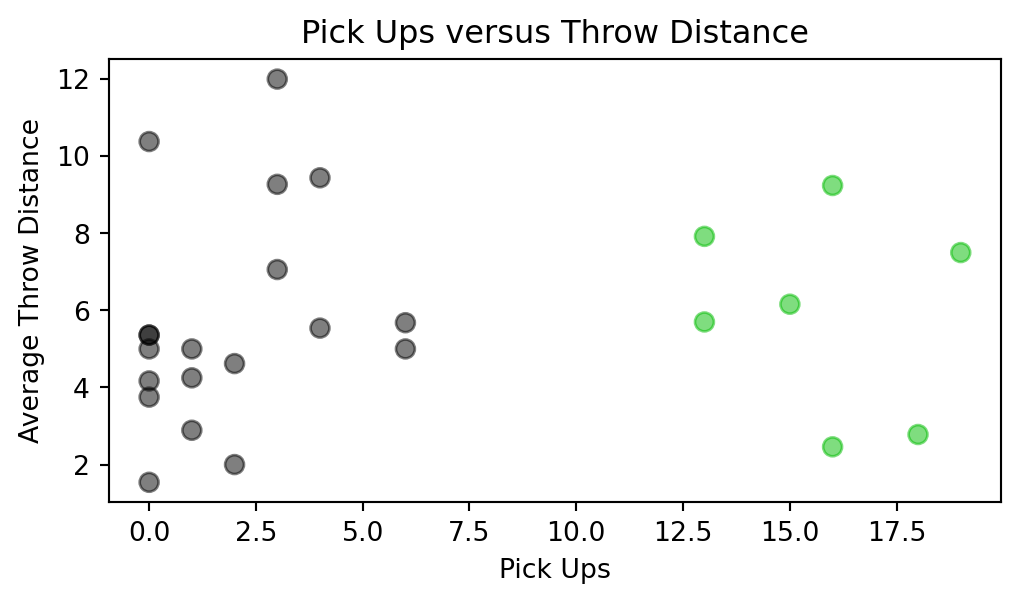

In [6]:
k = 2
fig = plt.figure(figsize = (6, 3))
ax = fig.add_subplot(111)
kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
kmeans.fit(X) 
labels = kmeans.fit_predict(X)
colors = cm.nipy_spectral(labels.astype(float) / k)
ax.scatter(X[:, 0], X[:, 1], s = 50, alpha = 0.5, c = colors)
ax.set_xlabel("Pick Ups")
ax.set_ylabel("Average Throw Distance")
ax.set_title("Pick Ups versus Throw Distance")
plt.show()